In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd

# Define column names from german.doc
column_names = [
    'Status_Checking_Acc', 'Duration', 'Credit_History', 'Purpose',
    'Credit_Amount', 'Savings_Account_Bonds', 'Employment',
    'Installment_Rate', 'Personal_Status_Sex', 'Other_Debtors',
    'Residence_Since', 'Property', 'Age', 'Other_Installment_Plans',
    'Housing', 'Number_Credits', 'Job', 'People_Maintained',
    'Telephone', 'Foreign_Worker', 'Credit_Risk'
]

# Load dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
df = pd.read_csv(url, sep=' ', header=None, names=column_names)

# Convert class label: 1 (good) -> 1, 2 (bad) -> 0
df['Credit_Risk'] = df['Credit_Risk'].map({1: 1, 2: 0})

# Save as CSV
csv_filename = 'german_credit_data.csv'
df.to_csv(csv_filename, index=False)

# Download the file to your local machine (only works in Colab)
from google.colab import files
files.download(csv_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,Status_Checking_Acc,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account_Bonds,Employment,Installment_Rate,Personal_Status_Sex,Other_Debtors,...,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,People_Maintained,Telephone,Foreign_Worker,Credit_Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status_Checking_Acc      1000 non-null   object
 1   Duration                 1000 non-null   int64 
 2   Credit_History           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Credit_Amount            1000 non-null   int64 
 5   Savings_Account_Bonds    1000 non-null   object
 6   Employment               1000 non-null   object
 7   Installment_Rate         1000 non-null   int64 
 8   Personal_Status_Sex      1000 non-null   object
 9   Other_Debtors            1000 non-null   object
 10  Residence_Since          1000 non-null   int64 
 11  Property                 1000 non-null   object
 12  Age                      1000 non-null   int64 
 13  Other_Installment_Plans  1000 non-null   object
 14  Housing                  1000 non-null   

In [ ]:
df['Credit_Risk'].value_counts()

,count
Credit_Risk,
1,700
0,300


In [ ]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(i,": ",df[i].unique())
    print("-"*64)

Status_Checking_Acc :  ['A11' 'A12' 'A14' 'A13']
----------------------------------------------------------------
Credit_History :  ['A34' 'A32' 'A33' 'A30' 'A31']
----------------------------------------------------------------
Purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
----------------------------------------------------------------
Savings_Account_Bonds :  ['A65' 'A61' 'A63' 'A64' 'A62']
----------------------------------------------------------------
Employment :  ['A75' 'A73' 'A74' 'A71' 'A72']
----------------------------------------------------------------
Personal_Status_Sex :  ['A93' 'A92' 'A91' 'A94']
----------------------------------------------------------------
Other_Debtors :  ['A101' 'A103' 'A102']
----------------------------------------------------------------
Property :  ['A121' 'A122' 'A124' 'A123']
----------------------------------------------------------------
Other_Installment_Plans :  ['A143' 'A141' 'A142']
-----------------------

In [ ]:
df.isnull().sum()

,0
Status_Checking_Acc,0
Duration,0
Credit_History,0
Purpose,0
Credit_Amount,0
Savings_Account_Bonds,0
Employment,0
Installment_Rate,0
Personal_Status_Sex,0
Other_Debtors,0


# TRAIN TEST SPLIT

In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [ ]:
X

,Status_Checking_Acc,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account_Bonds,Employment,Installment_Rate,Personal_Status_Sex,Other_Debtors,Residence_Since,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,People_Maintained,Telephone,Foreign_Worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [ ]:
Y

,Credit_Risk
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.33)

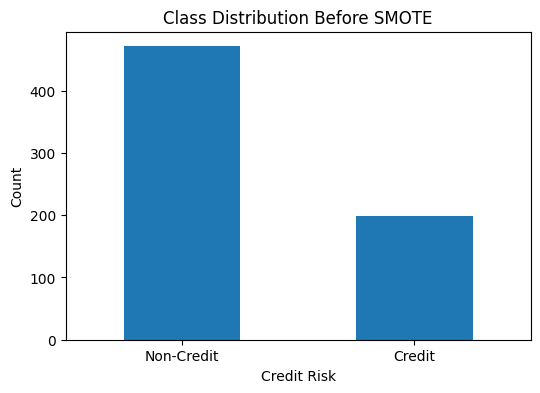

In [132]:
import matplotlib.pyplot as plt

# Plotting class distribution before SMOTE
plt.figure(figsize=(6, 4))
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Credit', 'Credit'], rotation = 0)
plt.show()


FEATURE ENGINEERING

In [133]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [134]:
cat_columns = X_train.select_dtypes(include='object').columns

X_train[cat_columns] = encoder.fit_transform(X_train[cat_columns])
X_test[cat_columns] = encoder.transform(X_test[cat_columns])

X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [135]:
y_train.value_counts()

,count
Credit_Risk,
1,471
0,199


In [136]:
## applying SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train,y_train = smote.fit_resample(X_train, y_train)

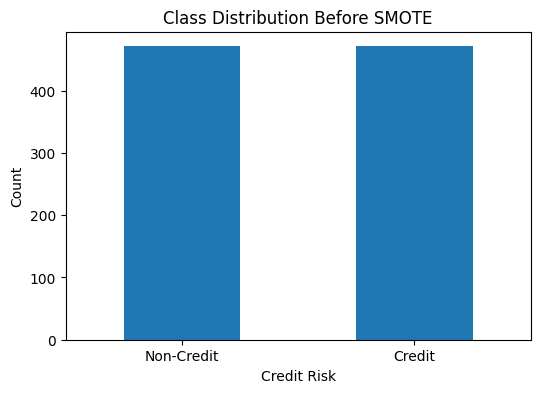

In [137]:
# Plotting class distribution after SMOTE
plt.figure(figsize=(6, 4))
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Credit', 'Credit'], rotation = 0)
plt.show()

In [ ]:
X_train.head()

,Status_Checking_Acc,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account_Bonds,Employment,Installment_Rate,Personal_Status_Sex,Other_Debtors,Residence_Since,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,People_Maintained,Telephone,Foreign_Worker
0,1,30,3,9,2503,1,4,4,2,0,2,1,41,1,1,2,2,1,0,0
1,3,24,2,3,5511,1,2,4,2,0,1,2,25,1,1,1,2,1,0,0
2,0,12,2,0,1228,0,2,4,1,0,2,0,24,2,1,1,1,1,0,0
3,3,9,2,7,3832,4,4,1,2,0,4,0,64,2,1,1,1,1,0,0
4,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-1.07348399, -0.37315978, -0.3369011 , ..., -0.33490382,
        -0.75845292, -0.1717795 ],
       [-1.07348399, -0.37315978, -0.3369011 , ...,  2.98593193,
         1.31847339, -0.1717795 ],
       [-1.07348399,  0.13044554, -1.26757803, ..., -0.33490382,
        -0.75845292, -0.1717795 ],
       ...,
       [-0.25001337, -1.38037042,  0.59377583, ..., -0.33490382,
         1.31847339, -0.1717795 ],
       [-1.07348399, -1.38037042, -1.26757803, ..., -0.33490382,
        -0.75845292, -0.1717795 ],
       [ 1.39692787, -0.37315978, -0.3369011 , ..., -0.33490382,
        -0.75845292, -0.1717795 ]])

<Axes: >

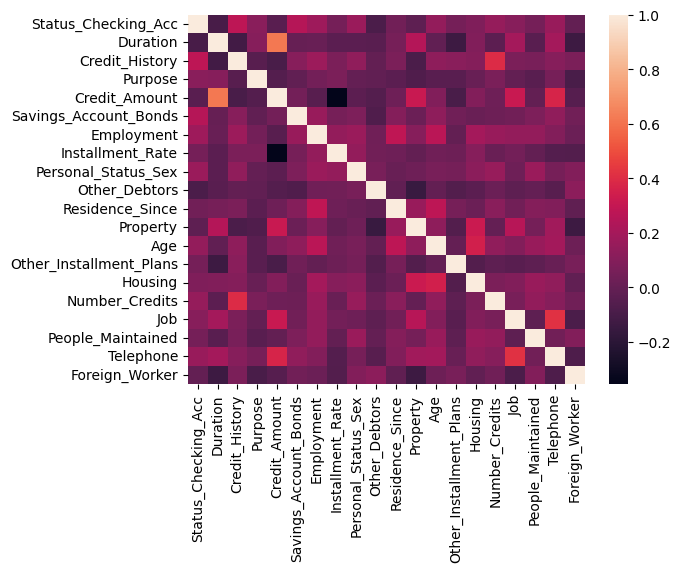

In [148]:
import seaborn as sns
plt.figsize=(10,10)
sns.heatmap(X_train.corr())

## Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [169]:
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayesian', GaussianNB())
]

In [170]:
for model_name, model in models:
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  rocauc_score = roc_auc_score(y_test, y_pred)

  print(model_name)
  print("accuracy score: ",accuracy)
  print(classification_report(y_test,y_pred))
  print("roc-auc score: ", rocauc_score)
  print('-'*64)

Logistic Regression
accuracy score:  0.7606060606060606
              precision    recall  f1-score   support

           0       0.60      0.65      0.63       101
           1       0.84      0.81      0.82       229

    accuracy                           0.76       330
   macro avg       0.72      0.73      0.72       330
weighted avg       0.77      0.76      0.76       330

roc-auc score:  0.7306628042716936
----------------------------------------------------------------
SVM
accuracy score:  0.6636363636363637
              precision    recall  f1-score   support

           0       0.41      0.24      0.30       101
           1       0.72      0.85      0.78       229

    accuracy                           0.66       330
   macro avg       0.57      0.54      0.54       330
weighted avg       0.62      0.66      0.63       330

roc-auc score:  0.5445760733278568
----------------------------------------------------------------
Random Forest
accuracy score:  0.7606060606060606


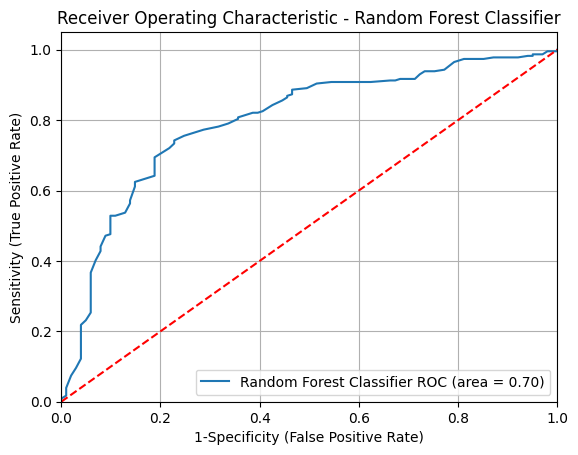

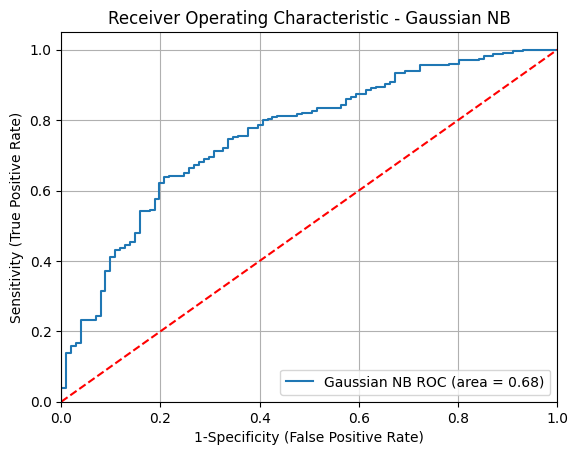

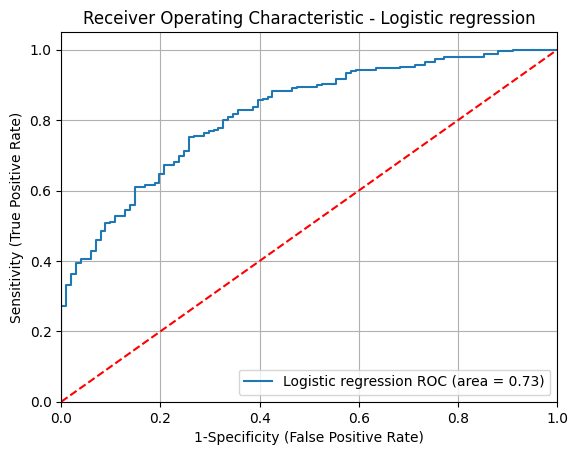

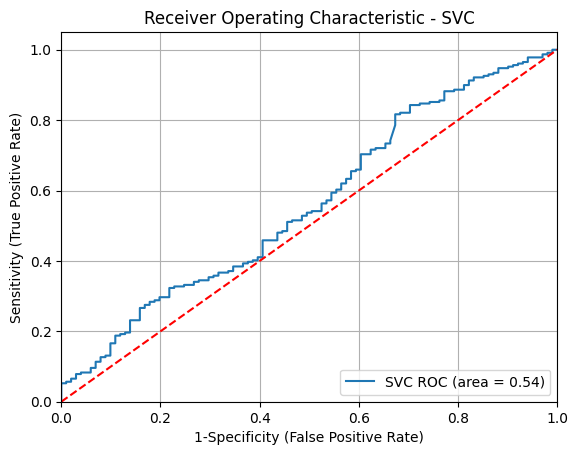

In [177]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Add the models to the list that you want to view on the ROC plot
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(),
        'auc':  0.70
    },
    {
        'label': 'Gaussian NB',
        'model': GaussianNB(),
        'auc':  0.68
    },
    {
        'label': 'Logistic regression',
        'model': LogisticRegression(solver='liblinear'),
        'auc':  0.73
    },
    {
        'label': 'SVC',
        'model': SVC(probability=True),
        'auc':  0.54
    },

]

# Create loop through all models
for algo in auc_models:
    model = algo['model']  # Select the model
    model.fit(X_train, y_train)  # Train the model

    # Compute False Positive Rate, and True Positive Rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Create a new figure for each model to plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

    # Custom settings for the plot
    plt.grid()
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title(f'Receiver Operating Characteristic - {algo["label"]}')
    plt.legend(loc="lower right")




In [178]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'class_weight': ['balanced']
}

nb_params = {
    'var_smoothing': np.logspace(-11, -7, 100)  # 100 log-spaced values between 1e-11 and 1e-7
}

lr_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Added 'elasticnet' for certain solvers
    'C': np.logspace(-4, 4, 20),  # 20 log-spaced values between 1e-4 and 1e4
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],  # Multiple solvers
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 500],
    'l1_ratio': [0.0, 0.5, 1.0],  # Relevant for 'elasticnet' penalty
}

In [179]:
randomcv_models = [
                   ("Naive Bias",GaussianNB(),nb_params),
                    ("RF", RandomForestClassifier(), rf_params),
                   ("Logistic Regression",LogisticRegression(),lr_params)
                   ]

In [180]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,
                                n_iter=100,
                                n_jobs=-1,
                                verbose=2,
                                cv=5,
                                scoring='roc_auc')

    ## 100 number of randomized combinations are choosed and cv = 3 is applied to every single combination
    ## 100 *3 = 300

    random.fit(X_train,y_train)
    model_param[name] = random.best_params_

    for model_name in model_param:
        print(f"---------------- Best Params for {model_name} -------------------")
        print(model_param[model_name])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
---------------- Best Params for Naive Bias -------------------
{'var_smoothing': np.float64(7.3907220335257755e-09)}
Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


---------------- Best Params for Naive Bias -------------------
{'var_smoothing': np.float64(7.3907220335257755e-09)}
---------------- Best Params for RF -------------------
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'class_weight': 'balanced', 'bootstrap': True}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
---------------- Best Params for Naive Bias -------------------
{'var_smoothing': np.float64(7.3907220335257755e-09)}
---------------- Best Params for RF -------------------
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'class_weight': 'balanced', 'bootstrap': True}
---------------- Best Params for Logistic Regression -------------------
{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'l1_ratio': 0.5, 'class_weight': 'balanced', 'C': np.float64(0.23357214690901212)}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
185 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

In [184]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=None, class_weight='balanced', bootstrap=True),
    "Gaussian NB": GaussianNB(var_smoothing= np.float64(7.3907220335257755e-09)),
    "Logistic Regression": LogisticRegression(solver='newton-cg', penalty='l2', max_iter=200, l1_ratio=0.5, class_weight='balanced', C=np.float64(0.23357214690901212)
)
}


for model_name, model in models.items():
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  rocauc_score = roc_auc_score(y_test, y_pred)

  print(model_name)
  print("accuracy score: ",accuracy)
  print(classification_report(y_test,y_pred))
  print("roc-auc score: ", rocauc_score)
  print('-'*64)

Random Forest
accuracy score:  0.7545454545454545
              precision    recall  f1-score   support

           0       0.61      0.56      0.58       101
           1       0.81      0.84      0.83       229

    accuracy                           0.75       330
   macro avg       0.71      0.70      0.71       330
weighted avg       0.75      0.75      0.75       330

roc-auc score:  0.7013921916209088
----------------------------------------------------------------
Gaussian NB
accuracy score:  0.7454545454545455
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       101
           1       0.84      0.78      0.81       229

    accuracy                           0.75       330
   macro avg       0.71      0.72      0.71       330
weighted avg       0.76      0.75      0.75       330

roc-auc score:  0.7225128626399757
----------------------------------------------------------------
Logistic Regression
accuracy score:  0.745454545

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [185]:
## liblinear is showing better performance metrics due to small dataset

models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', penalty='l2', max_iter=200, l1_ratio=0.5, class_weight='balanced', C=np.float64(0.23357214690901212)
)
}


for model_name, model in models.items():
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  rocauc_score = roc_auc_score(y_test, y_pred)

  print(model_name)
  print("accuracy score: ",accuracy)
  print(classification_report(y_test,y_pred))
  print("roc-auc score: ", rocauc_score)
  print('-'*64)

Logistic Regression
accuracy score:  0.7606060606060606
              precision    recall  f1-score   support

           0       0.60      0.67      0.63       101
           1       0.85      0.80      0.82       229

    accuracy                           0.76       330
   macro avg       0.72      0.74      0.73       330
weighted avg       0.77      0.76      0.76       330

roc-auc score:  0.7361969821436292
----------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


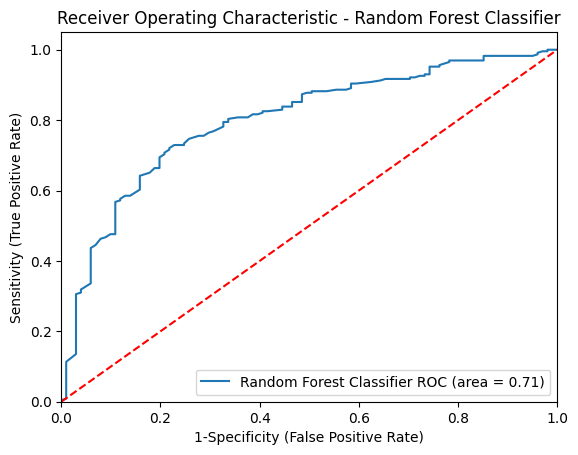

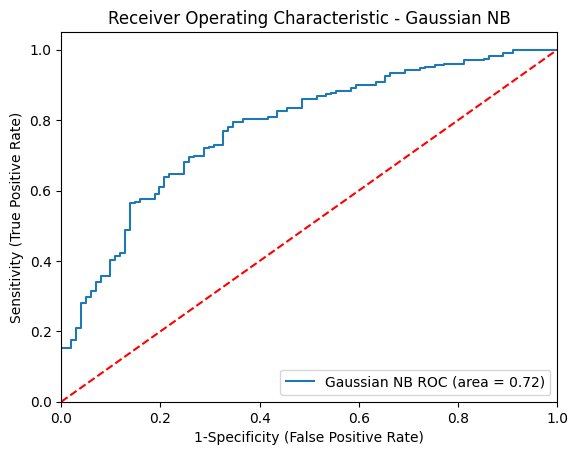

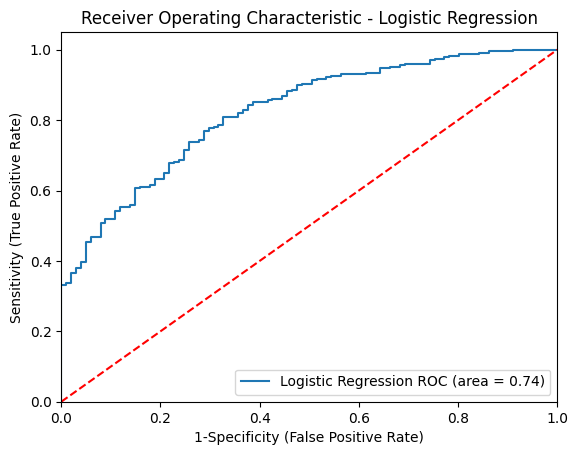

In [187]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Add the models to the list that you want to view on the ROC plot
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=None, class_weight='balanced', bootstrap=True),
        'auc':  0.71
    },
    {
        'label': 'Gaussian NB',
        'model': GaussianNB(var_smoothing= np.float64(7.3907220335257755e-09)),
        'auc':  0.72
    },
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(solver='liblinear', penalty='l2', max_iter=200, l1_ratio=0.5, class_weight='balanced', C=np.float64(0.23357214690901212)),
        'auc':  0.7361
    }
]

# Create loop through all models
for algo in auc_models:
    model = algo['model']  # Select the model
    model.fit(X_train, y_train)  # Train the model

    # Compute False Positive Rate, and True Positive Rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Create a new figure for each model to plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

    # Custom settings for the plot
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title(f'Receiver Operating Characteristic - {algo["label"]}')
    plt.legend(loc="lower right")


